# Introduction to Pandas

To install pandas package type: `conda install pandas` or `pip install pandas`. The usual way to import panadas is as the following:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Here we also imported matplotlib since it will help us do some data visualization and numpy because pandas is heavily connected to and dependent on numpy.

Pandas is a library providing high-performance, easy-to-use data structures and data analysis tools. The easiest way to imagine it is like this: pandas is the combination of excel sheets and SQL databases in Python. It is more robust than Excel but not as fast or scalable as SQL. It has a strong focus on data analysis and visualization too. 

This is [Pandas website](https://pandas.pydata.org) and a collection of tutorials can be found [here](https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html). 

## Pandas basics

### Datatypes in Pandas

There are two main datatypes in pandas. `pd.Series` and `pd.DataFrame`.

#### Series

Pandas Series is basically a (strictly) one dimensional vector with indecies. The index can be mostly anything and you can refer to the elements using those indeces. The vector elements have to have the same type. This kind of approach is very useful in timeseries data. You can create a series by passing a list to it.

In [3]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
print(s)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


In [4]:
s1 = pd.Series([1, 3, 5, np.nan, 6, 8], index=['a', 'b', 'c', 'd', 'e', 'f']) 
print(s1)

a    1.0
b    3.0
c    5.0
d    NaN
e    6.0
f    8.0
dtype: float64


#### DataFrame

DataFrames are basically several Series put next to each other into different column, where the columns type can be different, like one column can have integer elements while the other only strings. We will mostly elaborate DataFrames because most of its rules are valid for the Series too. 

There are three main ways to create DataFrames (and a few more less common ways). First is to pass a numpy array as elements and optionally you can define the index and column names too:

In [5]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [6]:
column_name = ['AA','BB', 'CC', 'DD']
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=column_name)
df

,AA,BB,CC,DD
2013-01-01,1.080570,0.242320,-0.151355,0.114002
2013-01-02,-1.580925,-0.111595,1.608941,-0.624579
2013-01-03,1.052176,1.386012,-0.320917,0.110570
2013-01-04,0.454711,0.605939,-0.714259,0.088143
2013-01-05,-1.191704,0.283181,0.749546,0.584073
2013-01-06,-0.457949,-0.865110,0.704761,0.144245


The second main way to define a dataframe is to pass a dictionary to the call, where the keys are the column names, the values are the elements of the columns. 

In [7]:
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'}, 
                  index=['first', 'second', 'third', 'fourth'])
df2

,A,B,C,D,E,F
first,1.0,2013-01-02,NaN,3,test,foo
second,1.0,2013-01-02,NaN,3,train,foo
third,1.0,2013-01-02,NaN,3,test,foo
fourth,1.0,2013-01-02,NaN,3,train,foo


Note that in the definition column F contains only one element while in the result that element is repeated (this is done automatically by pandas). Each column has to have the same number of rows. 

The third way is probably one of the most frequent way, when you read data from a file (like .csv) into a dataframe. Let's see that in action:

In [152]:
# read in 'imdb_1000.csv' and store it in a DataFrame named movies
imdb_1000_data_url = r'imdb_1000.csv'
movies = pd.read_csv(imdb_1000_data_url, header=0, sep=',')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


### View and investigate DataFrames

Here we go through the most common and useful methods that people use during their work with Pandas to get an insight on the data they are working with.

In [8]:
cols = list('ABC')
df = pd.DataFrame(np.cumsum(np.random.randn(100,3)+10, axis=1), columns=cols)
df.head()

,A,B,C
0,10.097718,18.890897,27.030888
1,9.928142,20.222866,29.609870
2,8.840214,18.348011,28.621286
3,11.908801,20.847033,31.202782
4,11.418284,21.340015,29.991604


In [9]:
df.tail(8)

,A,B,C
92,9.702749,21.334865,32.008060
93,10.103880,20.029960,30.817108
94,10.456289,22.291661,31.716206
95,9.513850,19.773842,29.989063
96,10.540738,19.500528,30.478436
97,10.941008,20.500220,29.373565
98,10.304220,20.054797,30.936563
99,9.229418,19.213768,29.709116


In [10]:
df.shape

(100, 3)

In [11]:
df.describe()

,A,B,C
count,100.000000,100.000000,100.000000
mean,10.166621,19.954548,29.895032
std,1.035801,1.578428,1.786428
min,7.194974,16.690921,25.036609
25%,9.443517,18.842835,28.511154
50%,10.124740,19.954884,29.920031
75%,10.769456,21.225323,31.064939
max,13.016850,24.620936,34.196674


In [12]:
df.columns

Index(['A', 'B', 'C'], dtype='object')

In [13]:
df.index

RangeIndex(start=0, stop=100, step=1)

### Manipulate DataFrames

There are many many ways to manipulate a DataFrame, just type `dir(df)` to see all the methods you can use on it. We will look at a few of them.

There are at least half a dozen `to_xxx` type of methods that are there to transform dataframes into another type of python type. Like `to_dict`:

In [14]:
df.to_dict()

{'A': {0: 10.09771821758986,
  1: 9.928142002581197,
  2: 8.840214157025496,
  3: 11.908801184409151,
  4: 11.418284128199945,
  5: 9.76853257400565,
  6: 10.130662823992921,
  7: 9.08273076669113,
  8: 9.260188127781891,
  9: 9.72430901728111,
  10: 9.992970781997098,
  11: 10.294223235087841,
  12: 10.028365293669303,
  13: 9.862002512109548,
  14: 10.748856148144284,
  15: 10.564889690992965,
  16: 10.447728272258777,
  17: 8.907951846236015,
  18: 10.832429438497371,
  19: 9.328103506083895,
  20: 10.864650591804894,
  21: 10.233734617084618,
  22: 11.23005063493447,
  23: 10.268175236740795,
  24: 12.475057576352985,
  25: 10.907122506878432,
  26: 9.21367494151785,
  27: 9.498809608932097,
  28: 10.118061155641891,
  29: 10.746752910047077,
  30: 8.997802249299655,
  31: 9.111980730739957,
  32: 10.543599766905515,
  33: 11.230825036354608,
  34: 11.099495770541552,
  35: 9.336975584965955,
  36: 11.865126480358173,
  37: 11.674478596571987,
  38: 9.945271747760339,
  39: 10.2895

In [15]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
A,10.097718,9.928142,8.840214,11.908801,11.418284,9.768533,10.130663,9.082731,9.260188,9.724309,...,8.478809,9.320968,9.702749,10.103880,10.456289,9.513850,10.540738,10.941008,10.304220,9.229418
B,18.890897,20.222866,18.348011,20.847033,21.340015,20.429702,19.144978,17.596383,18.017489,20.721562,...,18.853032,19.319313,21.334865,20.029960,22.291661,19.773842,19.500528,20.500220,20.054797,19.213768
C,27.030888,29.609870,28.621286,31.202782,29.991604,31.086977,29.906610,27.002131,26.523406,32.150056,...,27.405693,29.324792,32.008060,30.817108,31.716206,29.989063,30.478436,29.373565,30.936563,29.709116


Drop the column A (but the same is valid for rows, with different arguments):

In [16]:
df.drop(columns='A').head()

,B,C
0,18.890897,27.030888
1,20.222866,29.609870
2,18.348011,28.621286
3,20.847033,31.202782
4,21.340015,29.991604


You can easily add a new column to the dataframe:

In [42]:
df['text']=['one', 'two', np.nan, 'four'] * 25
df.head()

,A,B,C,text
2011-01-01,10.097718,18.890897,27.030888,one
2011-01-02,9.928142,20.222866,29.609870,two
2011-01-03,8.840214,18.348011,28.621286,NaN
2011-01-04,11.908801,20.847033,31.202782,four
2011-01-05,11.418284,21.340015,29.991604,one


Sort a column by its values:

In [43]:
df.sort_values(by='B', ascending=True).head()

,A,B,C,text
2011-02-01,9.111981,16.690921,27.824925,four
2011-01-18,8.907952,16.799900,27.012898,two
2011-02-12,7.438791,17.016964,28.520383,NaN
2011-03-16,8.668561,17.049756,25.036609,NaN
2011-02-20,7.194974,17.257948,27.030951,NaN


Note that by sorting by one column not just the other columns are moved but the index as well. 

Change index into dates.

In [44]:
dates = pd.date_range('2011-01-01', periods=100)

df=df.set_index(dates)
df.head()

,A,B,C,text
2011-01-01,10.097718,18.890897,27.030888,one
2011-01-02,9.928142,20.222866,29.609870,two
2011-01-03,8.840214,18.348011,28.621286,NaN
2011-01-04,11.908801,20.847033,31.202782,four
2011-01-05,11.418284,21.340015,29.991604,one


### Selection

There are many different ways you can select an element, column(s) or row(s). Depending on how you are doing the returned object can be a Series or a DataFrame. 

In [45]:
df['A'].head()

2011-01-01    10.097718
2011-01-02     9.928142
2011-01-03     8.840214
2011-01-04    11.908801
2011-01-05    11.418284
Freq: D, Name: A, dtype: float64

In [46]:
type(df['A'])

pandas.core.series.Series

In [47]:
df[['A']].head()

,A
2011-01-01,10.097718
2011-01-02,9.928142
2011-01-03,8.840214
2011-01-04,11.908801
2011-01-05,11.418284


In [48]:
type(df[['A']])

pandas.core.frame.DataFrame

You can use the from:to form of lists to select which rows you want to deal with:

In [49]:
df[0:3]

,A,B,C,text
2011-01-01,10.097718,18.890897,27.030888,one
2011-01-02,9.928142,20.222866,29.609870,two
2011-01-03,8.840214,18.348011,28.621286,NaN


The same can be achieved by referring to the index names:

In [50]:
df['2011-01-01':'2011-01-04']

,A,B,C,text
2011-01-01,10.097718,18.890897,27.030888,one
2011-01-02,9.928142,20.222866,29.609870,two
2011-01-03,8.840214,18.348011,28.621286,NaN
2011-01-04,11.908801,20.847033,31.202782,four


The previous two methods are selecting all the columns. If you want to do selection on columns too, you can use the `.loc` or `.iloc` methods. The former allows to refer to the index names, while the latter refers to the numbering of the index and columns. The `.iloc` slicing is very similar to the slicing in numpy. Here are two examples:

In [51]:
df.loc['2011-02-01':'2011-02-04', ['A','B']]

,A,B
2011-02-01,9.111981,16.690921
2011-02-02,10.543600,19.797448
2011-02-03,11.230825,23.015949
2011-02-04,11.099496,18.209158


In [52]:
df.iloc[0:2,:-2]

,A,B
2011-01-01,10.097718,18.890897
2011-01-02,9.928142,20.222866


Just as in numpy, you can do slicing with booleans. For example lets find out which row contains numbers between 10 and 11 in column A:

In [66]:
df[(df['A']>10) & (df['A']<11)].head()

,A,B,C,text
2011-01-01,10.097718,18.890897,27.030888,one
2011-01-07,10.130663,19.144978,29.906610,NaN
2011-01-12,10.294223,19.866178,29.933451,four
2011-01-13,10.028365,17.811800,28.041256,one
2011-01-15,10.748856,20.065713,30.157760,NaN


In [67]:
df[df.text.isin(['one','four'])].head()

,A,B,C,text
2011-01-01,10.097718,18.890897,27.030888,one
2011-01-04,11.908801,20.847033,31.202782,four
2011-01-05,11.418284,21.340015,29.991604,one
2011-01-08,9.082731,17.596383,27.002131,four
2011-01-09,9.260188,18.017489,26.523406,one


If the dataframe has missing data, you can drop them or fill them with something else. 

In [68]:
df.dropna(how='any').head()

,A,B,C,text
2011-01-01,10.097718,18.890897,27.030888,one
2011-01-02,9.928142,20.222866,29.609870,two
2011-01-04,11.908801,20.847033,31.202782,four
2011-01-05,11.418284,21.340015,29.991604,one
2011-01-06,9.768533,20.429702,31.086977,two


In [69]:
df.fillna(value='HELLO').head()

,A,B,C,text
2011-01-01,10.097718,18.890897,27.030888,one
2011-01-02,9.928142,20.222866,29.609870,two
2011-01-03,8.840214,18.348011,28.621286,HELLO
2011-01-04,11.908801,20.847033,31.202782,four
2011-01-05,11.418284,21.340015,29.991604,one


### Operations

Pandas allows you to simply do some arithmetics and stats. 

In [70]:
df.mean()

A    10.166621
B    19.954548
C    29.895032
dtype: float64

In [72]:
df.mean(axis=1).head()

2011-01-01    18.673168
2011-01-02    19.920293
2011-01-03    18.603170
2011-01-04    21.319539
2011-01-05    20.916634
Freq: D, dtype: float64

In [73]:
df.shift(2).head()

,A,B,C,text
2011-01-01,NaN,NaN,NaN,NaN
2011-01-02,NaN,NaN,NaN,NaN
2011-01-03,10.097718,18.890897,27.030888,one
2011-01-04,9.928142,20.222866,29.609870,two
2011-01-05,8.840214,18.348011,28.621286,NaN


In pandas it is very simply to apply rolling functions with the `rolling` method.

In [77]:
df.A.rolling(3).std().head()

2011-01-01         NaN
2011-01-02         NaN
2011-01-03    0.682356
2011-01-04    1.555786
2011-01-05    1.648397
Freq: D, Name: A, dtype: float64

Using the apply method one can apply any self defined function.

In [79]:
df[['A','B','C']].apply(np.cumsum).head()

,A,B,C
2011-01-01,10.097718,18.890897,27.030888
2011-01-02,20.025860,39.113763,56.640758
2011-01-03,28.866074,57.461774,85.262044
2011-01-04,40.774876,78.308807,116.464826
2011-01-05,52.193160,99.648822,146.456430


In [81]:
df[['A','B','C']].apply(lambda x: x.max() - x.min())

A    5.821876
B    7.930015
C    9.160065
dtype: float64

### Grouping

In pandas you can perform certain calculation by grouping column values into groups and performing the calculation:

In [83]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three',
                         'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,0.865314,0.725929
1,bar,one,0.375642,-0.349524
2,foo,two,0.398891,-0.753096
3,bar,three,0.037671,0.491434
4,foo,two,0.839007,0.723922
5,bar,two,0.350637,-0.863987
6,foo,one,-1.328683,0.063337
7,foo,three,-0.324676,0.968039


In [84]:
df.groupby('A').count()

,B,C,D
A,,,
bar,3,3,3
foo,5,5,5


In [85]:
df.groupby('B').sum()

,C,D
B,,
one,-0.087727,0.439742
three,-0.287005,1.459473
two,1.588536,-0.893161


In [87]:
df.groupby(['A','B']).mean()

C         D
A   B                        
bar one    0.375642 -0.349524
    three  0.037671  0.491434
    two    0.350637 -0.863987
foo one   -0.231684  0.394633
    three -0.324676  0.968039
    two    0.618949 -0.014587

### Merging

Pandas is got to do some SQL like joining and merging.

In [92]:
left = pd.DataFrame({'key': ['foo', 'bar', 'egg'], 'lval': [1, 2,3]})
print(left)
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
print(right)

   key  lval
0  foo     1
1  bar     2
2  egg     3
   key  rval
0  foo     4
1  bar     5


In [94]:
left.merge(right, on='key', how='outer')

,key,lval,rval
0,foo,1,4.0
1,bar,2,5.0
2,egg,3,NaN


In [95]:
left.merge(right, on='key', how='inner')

,key,lval,rval
0,foo,1,4
1,bar,2,5


### Plotting

Pandas provide an easy way to plot its content:

In [97]:
df = pd.DataFrame(np.random.randn(1000, 4), index=pd.date_range('1/1/2000', periods=1000),
                      columns=['A', 'B', 'C', 'D'])
df.head()

,A,B,C,D
2000-01-01,1.250402,1.222400,-0.527586,0.214427
2000-01-02,0.419948,-0.435627,-0.300416,0.171833
2000-01-03,1.453534,0.489392,-0.579825,-0.601518
2000-01-04,1.009457,-0.014010,-0.232209,-0.362395
2000-01-05,-0.573379,0.849379,-0.580498,0.082800


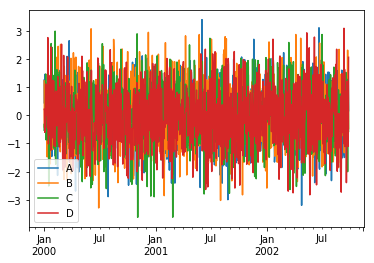

In [98]:
df.plot()

In [99]:
df=df.cumsum()

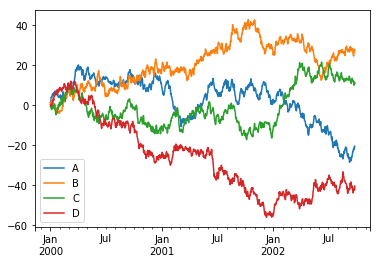

In [100]:
df.plot()

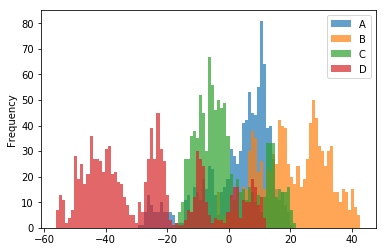

In [102]:
df.plot(kind='hist', alpha=0.7, bins=100)

## Pandas real life application

Lets look into the `movies` dataframe and investigate it from data point of view and try to observe a few consequences from the data. The first thing is to look at the data briefly:

In [153]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


It prints out the data in an excel sheet like format. Let us investigate the characteristics of the columns and the whole datasheet:

In [154]:
# check the data type of each column
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
star_rating       979 non-null float64
title             979 non-null object
content_rating    976 non-null object
genre             979 non-null object
duration          979 non-null int64
actors_list       979 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


Now we can see there are 979 entries and we can see the types and amount of data in each column. Also the different datatypes are listed and we see how much space does this data take.

With this quick investigation we can see that in the `content_rating` column there are less inputs. We will look into that later. First let us see if there are duplicated rows.

In [155]:
movies.drop_duplicates().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 979 entries, 0 to 978
Data columns (total 6 columns):
star_rating       979 non-null float64
title             979 non-null object
content_rating    976 non-null object
genre             979 non-null object
duration          979 non-null int64
actors_list       979 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 53.5+ KB


Since the `info` method does not show any change we can conclude that all the rows are different (there is at least one column in a row that is different from other rows).

Now let us see what are the unique values of the `content_rating` column:

In [156]:
pd.unique(movies.content_rating)

array(['R', 'PG-13', 'NOT RATED', 'PG', 'UNRATED', 'APPROVED', 'PASSED',
       'G', 'X', nan, 'TV-MA', 'GP', 'NC-17'], dtype=object)

It contains different rating categories but there are NAN values too. This is why we see less input in this column when looking at the `info` method. 

Lets look at the rows that have NAs in them:

In [157]:
movies[movies.content_rating.isna()]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


As we expected there are 3 rows.

Now lets look at some of the stats of the columns that contain numbers:

In [158]:
movies.describe()

,star_rating,duration
count,979.000000,979.000000
mean,7.889785,120.979571
std,0.336069,26.218010
min,7.400000,64.000000
25%,7.600000,102.000000
50%,7.800000,117.000000
75%,8.100000,134.000000
max,9.300000,242.000000


There are 2 numerical columns. For example we can see that the shortest film is 64 min and the longest is 242 min in this database. The average film length is 121. We can calculate it manually too like this:

In [159]:
# calculate the average movie duration
movies['duration'].mean()

120.97957099080695

Lets sort the data by the duration of the films:

In [160]:
# sort the DataFrame by duration to find the shortest and longest movies
movies.sort_values('duration').head()

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."


We can also visualize these findings with a histogram:

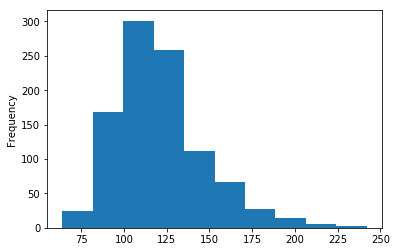

In [161]:
# create a histogram of duration, choosing an "appropriate" number of bins
movies['duration'].plot(kind='hist', bins=10)

Another way to represent it is by using boxplot:

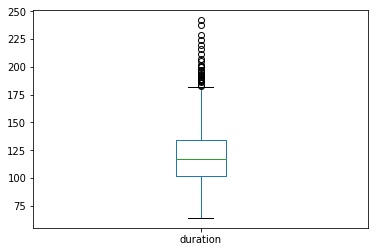

In [162]:
# use a box plot to display that same data
movies['duration'].plot(kind='box')

We can perform data analysis by grouping certain parameters. In the next line we count how many movies have the same content rating:

In [163]:
# count how many movies have each of the content ratings
movies[['content_rating','title']].groupby('content_rating').count()

,title
content_rating,
APPROVED,47
G,32
GP,3
NC-17,7
NOT RATED,65
PASSED,7
PG,123
PG-13,189
R,460


We can visualize this too with some further information:

Text(0, 0.5, 'Title Count')

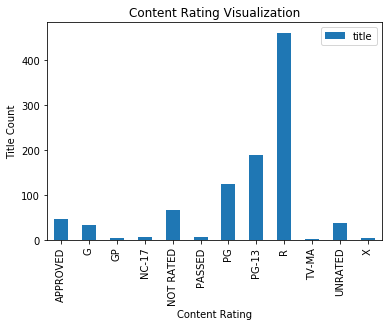

In [164]:
# use a visualization to display that same data, including a title and x and y labels #fontsize=25
movies[['content_rating','title']].groupby('content_rating').count().plot(kind='bar', title='Content Rating Visualization')
plt.xlabel('Content Rating')
plt.ylabel('Title Count')

We can convert column values to other values like this:

In [165]:
# convert the following content ratings to "NC-17": X, TV-MA
movies['content_rating'].replace(['X','TV-MA'],'NC-17').head()

0        R
1        R
2        R
3    PG-13
4        R
Name: content_rating, dtype: object

Another way to see how many missing values are in the database is:

In [166]:
# count the number of missing values in each column
movies.isnull().sum(axis=0)

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

Lets fill in the missing values with some reasonable estimation:

In [168]:
# if there are missing values: examine them, then fill them in with "reasonable" values
movies[movies['content_rating'].isnull()]
movies.at[(187,649),'content_rating'] = 'PG'
movies.at[936,'content_rating'] = 'PG-13'

A bit more complicated task is to do stats after filtering certain conditions. Like lets see what is the star rating of films longer than 2 hours. 

In [169]:
# calculate the average star rating for movies 2 hours or longer,
# and compare that with the average star rating for movies shorter than 2 hours

#movies[movies['duration'] < 120]['star_rating'].mean()

print('Avg. star rating for movies 2 hours or longer: ', movies[movies['duration'] >= 120]['star_rating'].mean(), 
      '\nAvg. star rating for movies shorter than 2 hours: ', movies[movies['duration'] < 120]['star_rating'].mean())

Avg. star rating for movies 2 hours or longer:  7.948898678414082 
Avg. star rating for movies shorter than 2 hours:  7.838666666666657


Lets visualize if there is a relation between the star rating and the duration. 

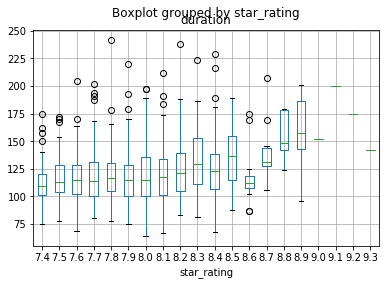

In [170]:
# use a visualization to detect whether there is a relationship between duration and star rating
#movies.plot(kind='scatter', x='duration', y='star_rating', alpha=0.3)
#movies.hist(column='duration', by='star_rating', sharex=True, sharey=True);
movies.boxplot(column='duration', by='star_rating');

We can conclude that the star rating is slightly going up as the duration increases. 

Lets see if there are films with the same title:

In [172]:
# check if there are multiple movies with the same title, and if so, determine if they are actually duplicates
result = movies[movies['title'].isin(movies[movies.duplicated(['title'])]['title'])]
result.sort_values('title')

,star_rating,title,content_rating,genre,duration,actors_list
703,7.6,Dracula,APPROVED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
936,7.4,True Grit,PG-13,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


Another complex stats on calculating the average star rating for each genre but only for those which have more than 10 movies:

In [21]:
# calculate the average star rating for each genre, but only include genres with at least 10 movies
genres = movies['genre'].value_counts()[movies['genre'].value_counts() > 10].index
movies[movies['genre'].isin(genres)].groupby('genre')['star_rating'].mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

Now we see a bit more complex investigation. Lets calculate in how many films have each actor played. For that we will use the `Counter` function from `collections`, write a helper function `repp`:

In [173]:
# Figure out something "interesting" using the actors data
# Which actor did how many movies
from collections import Counter

def repp(string):
    return string.replace("[","").replace("]","").replace("u'","").replace("',",",")[:-1]
    
movies_series = movies['actors_list'].apply(repp)

actors_list = []

for movie_actors in movies_series:
    tmp = [e.strip() for e in movie_actors.split(',')]
    for actor in tmp:
        actors_list.append(actor)

actor_dict = Counter(actors_list)

In [174]:
{actor:points for actor, points in actor_dict.items() if actor[0] == 'I'}

{'Ian McKellen': 8,
 'Ingrid Bergman': 3,
 'Inge Landgut': 1,
 'Ingrid Thulin': 1,
 'Ileana': 1,
 'Ivana Baquero': 1,
 'In-mun Kim': 1,
 'Irandhir Santos': 1,
 'Ir\\xe8ne Jacob': 1,
 'Iko Uwais': 2,
 'Ivan Dobronravov': 1,
 'Irrfan Khan': 1,
 'Iemasa Kayumi': 1,
 'Iain Rea': 1,
 'Isabelle Huppert': 1,
 'In-seo Kim': 1,
 'Isabella Rossellini': 1,
 'Ian Hendry': 1,
 'Idina Menzel': 1,
 'Irene Miracle': 1,
 'Ian McShane': 1,
 'Iben Hjejle': 1,
 'Imelda Staunton': 1,
 'Ione Skye': 1,
 'Imogene Coca': 1}

How many actors are there in total:

In [40]:
len(actor_dict)

1781

Which actor's history has the largest ratings over his/her films. For that we will extract the actors from each film and calculate the sum of the ratings then divide it by the number of the films they are present.

We will use two different approaches to do this. First we will define a function that will look into the actors list in each row and check if the input actor is in that list:

In [178]:
def is_actor_in(name_target, name_list):
    return name_target in name_list


Now we create a for loop where we loop over all the actors and apply the `is_actor_in` function to each row of the datasheet. The result of the function will be saved into a new column, with the actor's name and the observation of True or False whether he was playing or not in the film.

In [179]:
for actor in actor_dict.keys():
    movies[actor] = movies.actors_list.apply(lambda row: is_actor_in(actor, row))
        

In [180]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list,Tim Robbins,Morgan Freeman,Bob Gunton,Marlon Brando,...,Dan Castellaneta,Nancy Cartwright,Leslie Bibb,John Doman,Jessica Lange,Mary Steenburgen,Billy Boyd,JoBeth Williams,"u""Heather O'Rourke""",Tamara Tunie
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


This is the point where we can take two different approaches. First we move out from the dataframes and create a new dictionary that will contain the name of the actor, the average point he has gathered and the name of the movies he played in. At the end we turn this dictionary into a dataframe:

In [181]:
ba = {'Name': [], 'Points': [], 'Movies': []}
for actor in actor_dict.keys():
    films = movies[actor].sum()
    average_points = movies.star_rating[movies[actor]==True].sum() / films
    movie_list = list(movies.title[movies[actor]==True])
    ba['Name'].append(actor)
    ba['Points'].append(average_points)
    ba['Movies'].append(movie_list)

best_actor = pd.DataFrame(ba)


Now we sort the results over the points starting with the highest:

In [182]:
best_actor.sort_values('Points', ascending=False).head()

,Name,Points,Movies
2,Bob Gunton,9.3,[The Shawshank Redemption]
18,Eli Wallach,8.9,"[The Good, the Bad and the Ugly]"
16,Martin Balsam,8.9,[12 Angry Men]
11,John Travolta,8.9,[Pulp Fiction]
58,Lionel Barrymore,8.7,[It's a Wonderful Life]


The second approach is dataframe based. Here we subset the `movies` dataframe for each actor and create a `Name` column where we type his name. This way we obtain a lot of dataframes (one for each actor) and we concatenate them.

In [183]:
ba1 = pd.DataFrame()
colnames = ['star_rating', 'title', 'content_rating', 'genre', 'duration']

for actor in list(actor_dict.keys())[:100]:
    tmp = movies.loc[movies[actor]==True, colnames]
    tmp['Name'] = actor
    ba1 = pd.concat([ba1, tmp], sort=False, axis=0)

In [184]:
ba1.head(10)

,star_rating,title,content_rating,genre,duration,Name
0,9.3,The Shawshank Redemption,R,Crime,142,Tim Robbins
365,8.0,Mystic River,R,Crime,138,Tim Robbins
611,7.7,Short Cuts,R,Comedy,187,Tim Robbins
693,7.7,The Player,R,Comedy,124,Tim Robbins
819,7.6,Jacob's Ladder,R,Drama,113,Tim Robbins
0,9.3,The Shawshank Redemption,R,Crime,142,Morgan Freeman
24,8.7,Se7en,R,Drama,127,Morgan Freeman
119,8.3,Unforgiven,R,Western,131,Morgan Freeman
227,8.1,Million Dollar Baby,PG-13,Drama,132,Morgan Freeman
549,7.8,Lucky Number Slevin,R,Crime,110,Morgan Freeman


Now with this new dataframe we can do a lot of grouping and calculation. For example we can calculate the average star rating for each actor:

In [185]:
star_col = ['star_rating']
(ba1.groupby('Name').sum()[star_col] / ba1.groupby('Name').count()[star_col]).sort_values(star_col, ascending=False).head()

,star_rating
Name,
Bob Gunton,9.3
Eli Wallach,8.9
Martin Balsam,8.9
John Travolta,8.9
Matheus Nachtergaele,8.7


Or we can calculate the average film duration for each actor:

In [186]:
star_col = ['duration']
(ba1.groupby('Name').sum()[star_col] / ba1.groupby('Name').count()[star_col]).sort_values(star_col, ascending=False).head()

,duration
Name,
Keiko Tsushima,207.0
Takashi Shimura,175.0
Anne Hathaway,164.0
Eli Wallach,161.0
Orlando Bloom,160.5


## Homework

1) Calculate the average film duration for each genre.

In [187]:
# calculate the average duration for each genre
movies[['duration','genre']].groupby('genre').mean()

,duration
genre,
Action,126.485294
Adventure,134.840000
Animation,96.596774
Biography,131.844156
Comedy,107.602564
Crime,122.298387
Drama,126.539568
Family,107.500000
Fantasy,112.000000


2) Visualize the relationship between content rating and duration with a boxplot.

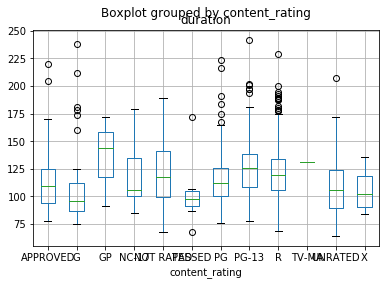

In [188]:
# visualize the relationship between content rating and duration
#movies[['content_rating','duration']].plot(kind='box')
movies.boxplot(column='duration', by='content_rating')

3) Determine the top star rated movie for each genre

In [189]:
# determine the top rated movie (by star rating) for each genre
movies.sort_values('star_rating', ascending=False).groupby('genre')['title','star_rating'].first()

,title,star_rating
genre,,
Action,The Dark Knight,9.0
Adventure,The Lord of the Rings: The Return of the King,8.9
Animation,Spirited Away,8.6
Biography,Schindler's List,8.9
Comedy,Modern Times,8.6
Crime,The Shawshank Redemption,9.3
Drama,12 Angry Men,8.9
Family,E.T. the Extra-Terrestrial,7.9
Fantasy,The City of Lost Children,7.7


4) Determine the most frequent genre for each actor for actors that played at least in 4 genres: 

In [232]:
ba1.head()

,star_rating,title,content_rating,genre,duration,Name
0,9.3,The Shawshank Redemption,R,Crime,142,Tim Robbins
365,8.0,Mystic River,R,Crime,138,Tim Robbins
611,7.7,Short Cuts,R,Comedy,187,Tim Robbins
693,7.7,The Player,R,Comedy,124,Tim Robbins
819,7.6,Jacob's Ladder,R,Drama,113,Tim Robbins


In [233]:
aa=ba1[['Name', 'genre']].drop_duplicates()
aa = aa.groupby('Name').count()
names = aa[aa.genre > 3].index

In [280]:
gnr = ba1[ba1.Name.isin(names.to_list())]
xx=gnr.groupby(['Name', 'genre']).count()
xx.groupby(level=0).apply(lambda subf: subf['title'].idxmax()[1])

Name
Al Pacino                   Crime
Brad Pitt                   Drama
Christian Bale             Action
Clint Eastwood             Action
Gary Oldman                Action
Harrison Ford              Action
Humphrey Bogart             Crime
Jack Nicholson              Drama
James Stewart               Drama
Joseph Gordon-Levitt       Action
Leonardo DiCaprio       Biography
Liam Neeson                Action
Matt Damon                 Action
Matthew McConaughey     Adventure
Morgan Freeman              Crime
Natalie Portman            Action
Ralph Fiennes               Drama
Robert De Niro              Crime
Robert Duvall               Drama
Tom Hanks               Animation
dtype: object